In [1]:
import pandas as pd
import numpy as np
import random
import sys
sys.path.append('../')
from modules import utils, constants
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def create_sankey(df, title, save=False, filename=False): #shows true and false positives 
    pos_df = df[df.y_actual == df.y_pred]
    neg_df = df[df.y_actual != df.y_pred]
    utils.draw_sankey_diagram(pos_df, neg_df, title, save, filename)

#### The test df

In [3]:
test_df = pd.read_csv('../test_dfs/21_jan/dqn_test_df_13000000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,score,is_success
0,0.0,17.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",0.0,14.0,1.0
1,1.0,18.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,17.0,True
2,2.0,19.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,17.0,True
3,3.0,18.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,13.0,True
4,4.0,18.0,1.0,0.0,0.0,"['cutaneous_lupus', 'delirium', 'low_c3', 'joi...",False,2.0,True


In [4]:
test_df_sans_inconc = test_df[~((test_df.y_actual == 2.0) | (test_df.y_pred ==2.0))]
len(test_df), len(test_df_sans_inconc)

(14000, 14000)

In [5]:
confusion_matrix(test_df['y_actual'], test_df['y_pred'])

array([[6625,  128],
       [ 134, 7113]])

In [6]:
print(classification_report(test_df['y_actual'], test_df['y_pred']))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6753
         1.0       0.98      0.98      0.98      7247

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



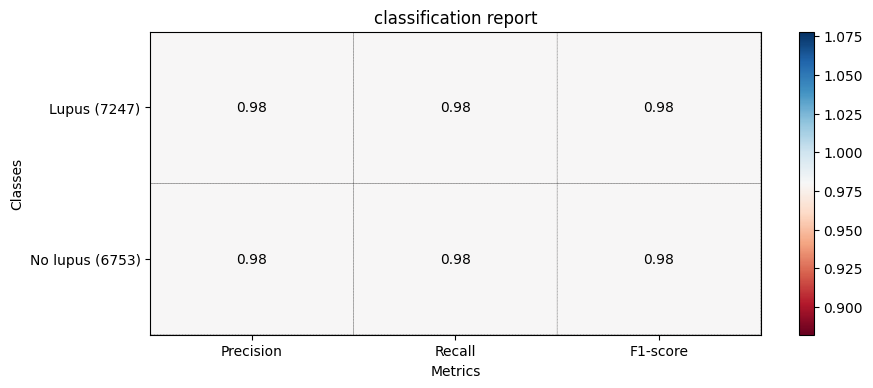

In [7]:
utils.plot_classification_report(test_df['y_actual'], test_df['y_pred'])

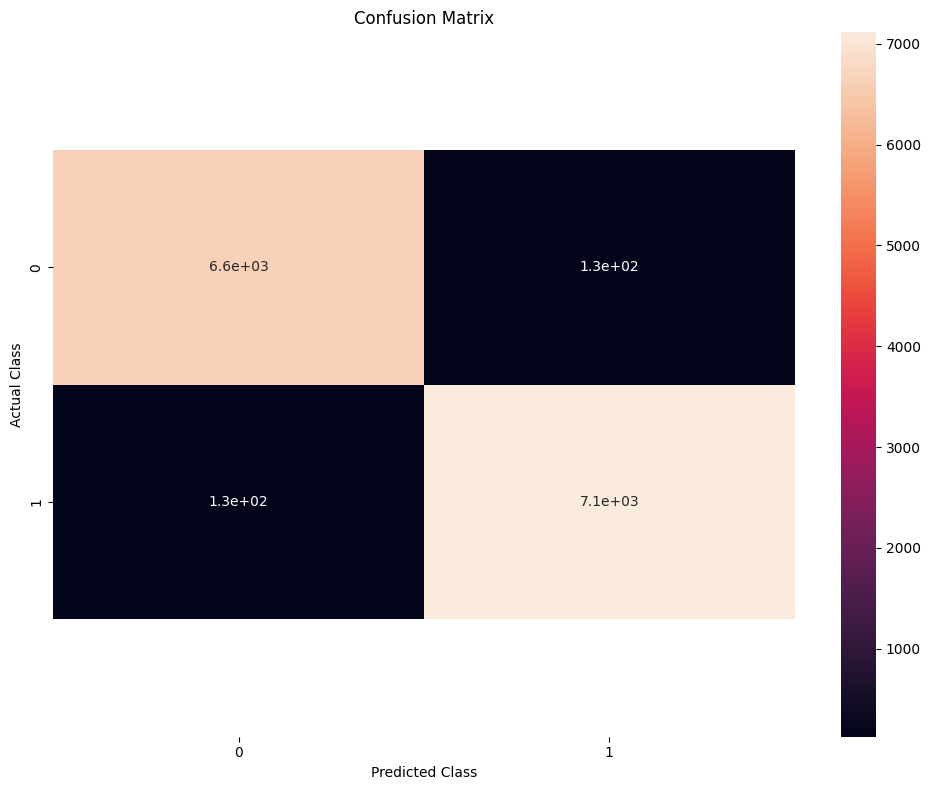

In [8]:
utils.plot_confusion_matrix(test_df['y_actual'], test_df['y_pred'])

In [9]:
test_df.y_actual.value_counts()

1.0    7247
0.0    6753
Name: y_actual, dtype: int64

In [10]:
test_df.y_pred.value_counts()

1.0    7241
0.0    6759
Name: y_pred, dtype: int64

#### delete from here

In [18]:
pos_df = test_df[test_df.y_actual == test_df.y_pred]
neg_df = test_df[test_df.y_actual != test_df.y_pred]
len(pos_df), len(neg_df)

(13738, 262)

In [31]:
# for pos_df
import ast
pos_frequency_dict = {}
for traj in pos_df.trajectory:
    if traj in pos_frequency_dict.keys():
        pos_frequency_dict[traj] += 1
    else:
        pos_frequency_dict[traj] = 1
pos_overall_tup_dict = {}
for key, value in pos_frequency_dict.items():
    new_key = ast.literal_eval(key)
    for tup in zip(new_key, new_key[1:]):
        if tup in pos_overall_tup_dict.keys():
            pos_overall_tup_dict[tup] += value
        else:
            pos_overall_tup_dict[tup] = value
pos_sankey_df = pd.DataFrame()
pos_sankey_df['Label1'] = [i[0] for i in pos_overall_tup_dict.keys()]
pos_sankey_df['Label2'] = [i[1] for i in pos_overall_tup_dict.keys()]
pos_sankey_df['value'] = list(pos_overall_tup_dict.values())
pos_sankey_df.head()

,Label1,Label2,value
0,cutaneous_lupus,delirium,13738
1,delirium,joint_involvement,2614
2,joint_involvement,low_c3,2614
3,low_c3,non_scarring_alopecia,2792
4,non_scarring_alopecia,fever,3365


In [32]:
# for neg df
neg_frequency_dict = {}
for traj in neg_df.trajectory:
    if traj in neg_frequency_dict.keys():
        neg_frequency_dict[traj] += 1
    else:
        neg_frequency_dict[traj] = 1
        
neg_overall_tup_dict = {}
for key, value in neg_frequency_dict.items():
    new_key = ast.literal_eval(key)
    for tup in zip(new_key, new_key[1:]):
        if tup in neg_overall_tup_dict.keys():
            neg_overall_tup_dict[tup] += value
        else:
            neg_overall_tup_dict[tup] = value
neg_sankey_df = pd.DataFrame()
neg_sankey_df['Label1'] = [i[0] for i in neg_overall_tup_dict.keys()]
neg_sankey_df['Label2'] = [i[1] for i in neg_overall_tup_dict.keys()]
neg_sankey_df['value'] = list(neg_overall_tup_dict.values())
neg_sankey_df.head()

,Label1,Label2,value
0,cutaneous_lupus,delirium,262
1,delirium,low_c3,210
2,low_c3,joint_involvement,207
3,joint_involvement,ana,11
4,ana,non_scarring_alopecia,11


In [33]:
unique_actions = list(set(list(pos_sankey_df['Label1'].unique()) + list(pos_sankey_df['Label2'].unique()) + list(neg_sankey_df['Label1'].unique()) + list(neg_sankey_df['Label2'].unique())))
dmap = dict(zip(unique_actions, range(len(unique_actions))))
dmap

{'ana': 0,
 'No lupus': 1,
 'anti_cardioliphin_antibodies': 2,
 'anti_β2gp1_antibodies': 3,
 'thrombocytopenia': 4,
 'fever': 5,
 'joint_involvement': 6,
 'anti_dsdna_antibody': 7,
 'Lupus': 8,
 'low_c3': 9,
 'seizure': 10,
 'anti_smith_antibody': 11,
 'lupus_anti_coagulant': 12,
 'oral_ulcers': 13,
 'delirium': 14,
 'cutaneous_lupus': 15,
 'auto_immune_hemolysis': 16,
 'non_scarring_alopecia': 17,
 'pericardial_effusion': 18,
 'psychosis': 19,
 'acute_pericarditis': 20,
 'low_c4': 21,
 'pleural_effusion': 22,
 'leukopenia': 23,
 'proteinuria': 24}

In [34]:
pos_sankey_df = utils.create_source_and_target(pos_sankey_df, dmap)
neg_sankey_df = utils.create_source_and_target(neg_sankey_df, dmap)
nodes_color = 'orange'
pos_sankey_df.head()

,Label1,Label2,value,source,target
160,ana,anti_dsdna_antibody,289,0,7
302,ana,fever,3,0,5
26,ana,anti_smith_antibody,3085,0,11
38,ana,proteinuria,568,0,24
279,ana,Lupus,54,0,8


In [35]:
neg_sankey_df.head()

,Label1,Label2,value,source,target
89,ana,anti_smith_antibody,78,0,11
97,ana,lupus_anti_coagulant,16,0,12
182,ana,anti_dsdna_antibody,4,0,7
187,ana,auto_immune_hemolysis,5,0,16
191,ana,thrombocytopenia,4,0,4


In [37]:
label = unique_actions
    
target = list(pos_sankey_df['target']) + list(neg_sankey_df['target'])
value = list(pos_sankey_df['value']) + list(neg_sankey_df['value'])
source = list(pos_sankey_df['source']) + list(neg_sankey_df['source'])
link_color = ['green']*len(pos_sankey_df) + ['red']*len(neg_sankey_df)
fig = go.Figure(data=[go.Sankey(
    node = dict(pad=15, thickness=20, line=dict(color='black', width=0.5), label=label, color=nodes_color),
    link= dict(source=source, target=target, value=value, color=link_color)
)])
fig.update_layout(title_text='Trial pathway', title_x=0.5,  title_font_size=24, title_font_color='black', 
                  title_font_family='Times New Roman')

fig.write_html(f'../pathways/21_jan/sample_pathway.html')
fig.show()

#### end here

In [ ]:
create_sankey(test_df, 'Overall pathways', True, filename = '../pathways/21_jan/test_df_13000000')

#### Success df

In [ ]:
success_df = pd.read_csv('../test_dfs/21_jan/dqn_success_df_13000000.csv')
create_sankey(success_df, 'Pathways of successful episodes', True, 
              filename = '../pathways/21_jan/success_df_13000000')

In [ ]:
for i in range(constants.CLASS_NUM):
    print(utils.lupus_classes[i])
    lupus_df = test_df[test_df.y_pred==i]
    if len(lupus_df != 0):
        create_sankey(lupus_df, utils.generate_title(i, len(lupus_df)), True, 
                      filename=f'../pathways/21_jan/{utils.generate_filename(i)}_13000000')